# Volume 4: Introduction to Initial and Boundary Value Problems

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

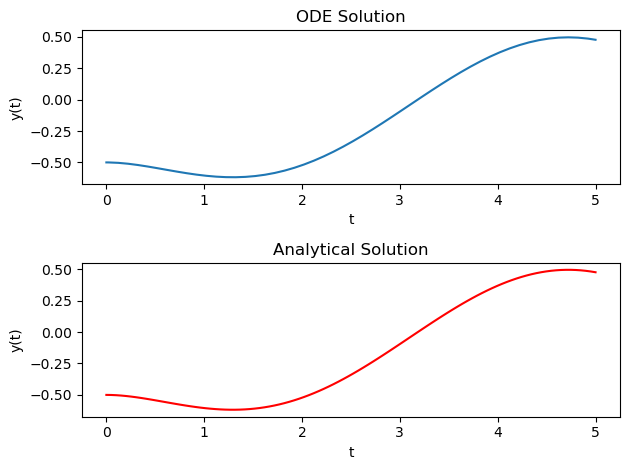

In [23]:
# element one the ODE function
def ode(t, y):
    """
    Defines the ODE to be solved
    """
    return np.array([y[1], np.sin(t) + y[0]])

# element two the time domain
t_span = [0, 5]

# element three the initial conditions
y0 = np.array([-0.5, 0])

# solve the system
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

# plot the solution
plt.subplot(2,1,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("ODE Solution")

x = np.linspace(0, 5, 100)
f = lambda t: -.5*(np.exp(-t) + np.sin(t))
plt.subplot(2,1,2)
plt.plot(x, f(x), color='red')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Analytical Solution')

plt.tight_layout()
plt.show()


### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

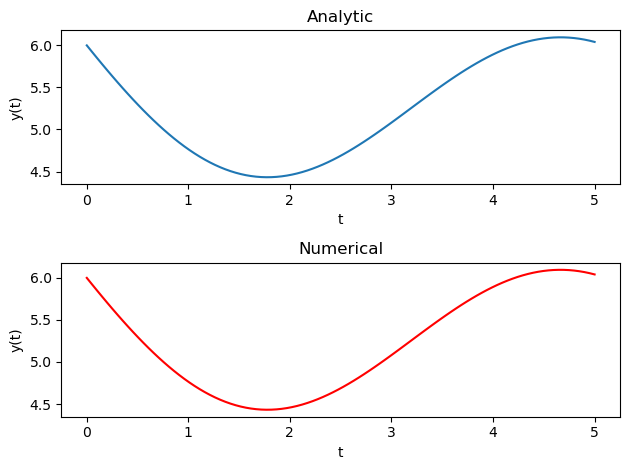

In [14]:
# initialize known values
a, b = 0, 5
x, y = 6, -0.324705

# element one the ODE function
ode = lambda t, y: np.array([y[1], (-1/4) * np.exp(-(1/2)*t) + np.sin(t) - np.cos(t) - y[1]])

# element two the boundary condition function
def bc(ya, yb):
    """
    Defines the boundary conditions
    """
    return np.array([ya[0] - x, yb[1] - y])

# element three the time domain
t_steps = 100
t = np.linspace(a, b, t_steps)

# element four the initial guess
y0 = np.ones((2, t_steps))

# solve the system
sol = solve_bvp(ode, bc, t, y0)

# plot the solution
plt.subplot(2,1,1)
plt.plot(t, np.exp(-0.5*t) - np.sin(t) + 5)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Analytic")

plt.subplot(2,1,2)
plt.plot(sol.x, sol.y[0], c="r")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Numerical")
plt.tight_layout()
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

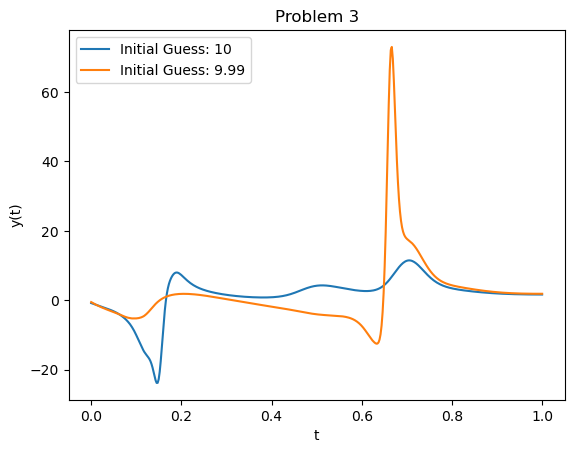

In [16]:
# initialize known values
a, b = 0, 1
x, y = -1, 3/2

# element one the ODE function
ode = lambda t, y: np.array([y[1], 10 * y[0] * (1 - y[1])])

# element two the boundary condition function
def bc(ya, yb):
    """
    Defines the boundary conditions
    """
    return np.array([ya[0] - x, yb[0] - y])

# element three the time domain
t_steps = 50
t = np.linspace(a, b, t_steps)

# element four the initial guess
y0 = np.ones((2, t_steps)) * 10
y1 = np.ones((2, t_steps)) * 9.99

# solve the system
sol1 = solve_bvp(ode, bc, t, y0)
sol2 = solve_bvp(ode, bc, t, y1)

# plot the solution
plt.plot(sol1.x, sol1.y[0], label="Initial Guess: 10")
plt.plot(sol2.x, sol2.y[0], label="Initial Guess: 9.99")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Problem 3")
plt.legend()
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

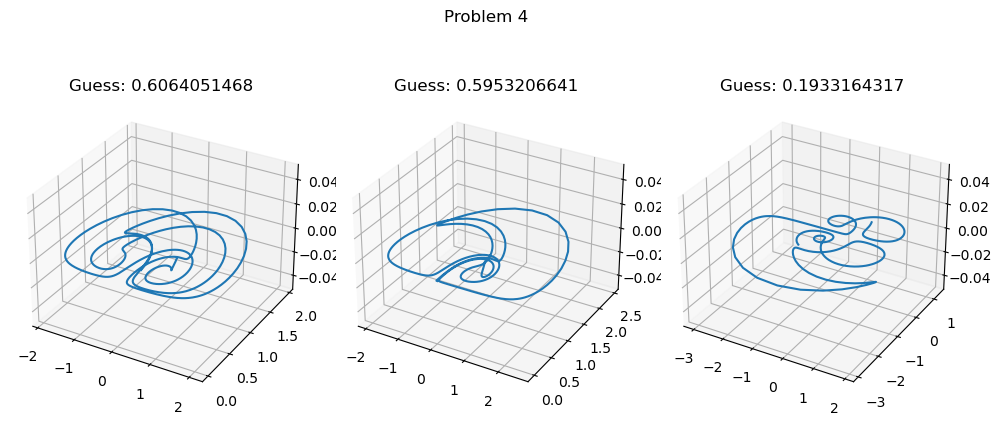

In [20]:
# initialize known values
a, b, c = 0.2, 0.001, -0.4

# element one the ODE function
ode1 = lambda t, y: np.array([a*y[0] + y[1]*y[2], b*y[0] + c*y[1] - y[0]*y[2], -y[2] - y[0]*y[1]])

# element two the boundary conditions
t_span = (0, 100)

# element three the initial conditions
y0 = np.array([np.random.random(3) for i in range(3)])

# solve the system
for i, guess in enumerate(y0):
    sol = solve_ivp(ode1, t_span, guess, max_step=0.1)
    plt.subplot(1, 3, i+1, projection='3d')
    plt.plot(sol.y[0], sol.y[1], label="Initial Guess: {}".format(guess))
    plt.title("Guess: {:.10f}".format(round(guess[0], 10)))
    plt.gca().set_aspect('auto', adjustable='box')

plt.tight_layout()
plt.suptitle("Problem 4")
# make all the plots larger
plt.gcf().set_size_inches(10, 5)
plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

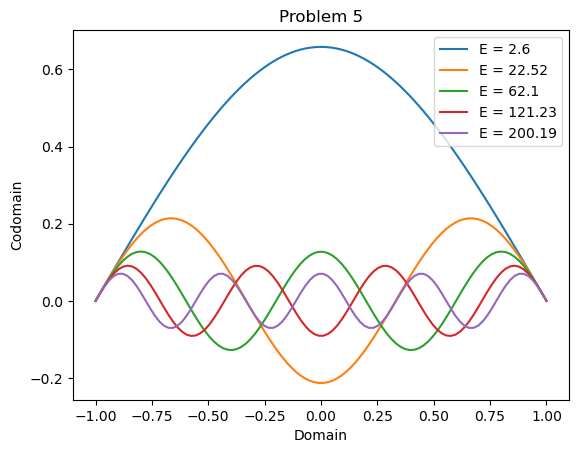

In [8]:
# initialize known values
a, b = -1, 1
x, y = 0, 1

# element one the ODE function
ode = lambda t, y, p: np.array([y[1], t**2 * y[0] - p * y[0]])

# element two the boundary condition function
def bc(ya, yb, p):
    """
    Defines the boundary conditions
    """
    return np.array([ya[0] - x, ya[1] - y, yb[0] - x])


# element three the time domain
t_steps = 100
t = np.linspace(a, b, t_steps)

# element four the initial guess
y0 = np.ones((2, t_steps))
p_guesses = [2.6, 22.52, 62.1, 121.23, 200.19]

# solve and plot the solution
for i, p in enumerate(p_guesses):
    sol = solve_bvp(ode, bc, t, y0, p=[p])
    plt.plot(sol.x, sol.y[0], label="E = {}".format(p_guesses[i]))

# set plot parameters
plt.xlabel('Domain')
plt.ylabel('Codomain')
plt.title("Problem 5")
plt.legend()
plt.show()
